# Analyse des nationalités et leur évolution dans le temps

Dans ce carnet est proposée une analyse de la place des nationalités sous forme de présences dans les aires géographiques en fonction du temps.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

### Librairies déjà installées avec Python
import pprint
import csv
import sys

import sqlite3 as sql

import time
import datetime
from dateutil import parser

from importlib import reload
from shutil import copyfile
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data1 = pd.read_csv("analyse_geo_personne.csv")

In [10]:
data1.head()

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817
3,http://www.wikidata.org/entity/Q255221,Táhirih,F,Asie,1817
4,http://www.wikidata.org/entity/Q43302262,Violante Atabalipa Ximenes de Bivar e Vellasco,F,Amérique du sud,1817


In [19]:
data1.tail()

,pk,nom,gender,zone_geo,annee_naissance
6140,http://www.wikidata.org/entity/Q60451813,Rukshana Kapali,LGBTQ,Asie,1999
6141,http://www.wikidata.org/entity/Q60614820,Kyra Gantois,F,Europe,1999
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999


In [12]:
### information sur le type de données
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pk               6145 non-null   object
 1   nom              6145 non-null   object
 2   gender           6145 non-null   object
 3   zone_geo         6145 non-null   object
 4   annee_naissance  6145 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 240.2+ KB


In [13]:
### Distribution des aires géographiques d'origine
data1.groupby(by='zone_geo').size().sort_values(ascending=False)

zone_geo
Europe              2628
Amérique du nord    1093
Asie                1000
Amérique du sud      751
Afrique              510
Océanie              163
dtype: int64

# Coder les différentes générations (25 ans)

In [26]:
### Créer une copie indépendante du DataFrame, comme on va la modifier
data_cop = data1[data1['annee_naissance'] < 2000].copy(deep=True)
data_cop.head(3)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817


In [28]:
data_cop.tail(3)

,pk,nom,gender,zone_geo,annee_naissance
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999


In [29]:
### Année minimale et maximale dans la population
min(data1['annee_naissance']), max(data1['annee_naissance'])


(1816, 1999)

In [30]:
l_25 = list(range(1816, 2017, 25))
l_25 [:5], l_25[-5:]

([1816, 1841, 1866, 1891, 1916], [1916, 1941, 1966, 1991, 2016])

In [31]:
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

data_cop['periodes'] = pd.cut(data_cop['annee_naissance'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
data_cop['periodes'] = data_cop['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
data_cop.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840


In [32]:
### compter les naissances par périodes de 25 ans
data_cop.groupby(by='periodes', observed=True).size()

periodes
1816-1840     138
1841-1865     382
1866-1890     492
1891-1915     425
1916-1940     961
1941-1965    1892
1966-1990    1599
1991-2015     256
dtype: int64

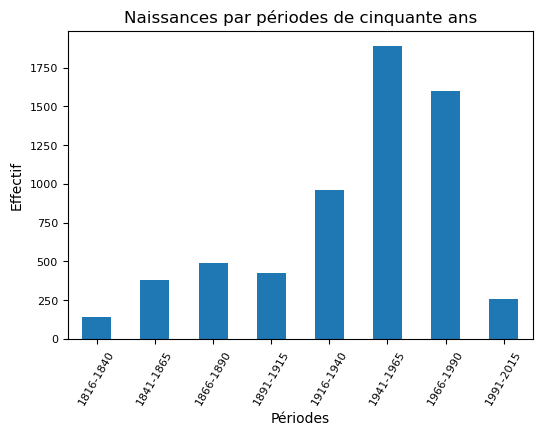

In [33]:
# Graphique qui démontre les effectifs par génération
ax = data_cop.groupby(by='periodes', observed=True).size().plot(kind='bar',rot=60, fontsize=8, figsize=(6,4))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Naissances par périodes de cinquante ans')
plt.show()

## Distribution des origines géographiques par périodes

In [36]:
### Tableau de contingence
X = "periodes"  # "0"
Y = "zone_geo"

ddf = data_cop[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_21131/343432698.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ddf = data_cop[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1816-1840,1841-1865,1866-1890,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015,Total
zone_geo,,,,,,,,,
Afrique,0,2,1,20,71,188,182,46,510
Amérique du nord,27,27,57,71,250,401,231,29,1093
Amérique du sud,4,9,29,70,117,257,230,35,751
Asie,1,10,28,56,114,335,394,62,1000
Europe,101,320,358,194,377,654,544,80,2628
Océanie,5,14,19,14,32,57,18,4,163
Total,138,382,492,425,961,1892,1599,256,6145


In [46]:
## Nombre de modalités ligne
K = ddf.shape[0]
## Nombre de modalités colonnes
L = ddf.shape[1]
# Effectif total
n = np.sum(ddf.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 7 , 9 ), effectif: 24580 , nombre max. facteurs: 6


In [47]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(ddf)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dff = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(ddf, method='cramer')
print('Cramer: ', vc)

Chi2 : 881.6680131510063 , dof : 48
p-value : 9.49009402104545e-154
phi2 = inertie (variance totale) : 0.035869325189219134
Cramer:  0.07731895540467328


In [52]:
## je ne comprends pas ce que c'est ce CA ?
afc = CA(row_labels=ddf.index,col_labels=ddf.columns)
afc.fit(ddf.values)

NameError: name 'CA' is not defined

In [43]:
eig = pd.DataFrame(afc.eig_)

r1 = round(eig.iloc[0], 3)
r2 = round(eig.iloc[2], 2)
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1 = r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
ax2 = r2.plot(kind='bar', ax=axes[1], title="Frequence cumulative de l'eigenvalue ")


ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

NameError: name 'afc' is not defined

In [51]:
residus_ponderes = (round((ddf.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= ddf.columns
residus_ponderes.index=ddf.index


fig, ax = plt.subplots(figsize=(6,4))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=45, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=45, fontsize=8)

plt.savefig('images/mod_periode_aire_resid_ponderes.jpg', bbox_inches='tight')
plt.show()

NameError: name 'dfe' is not defined